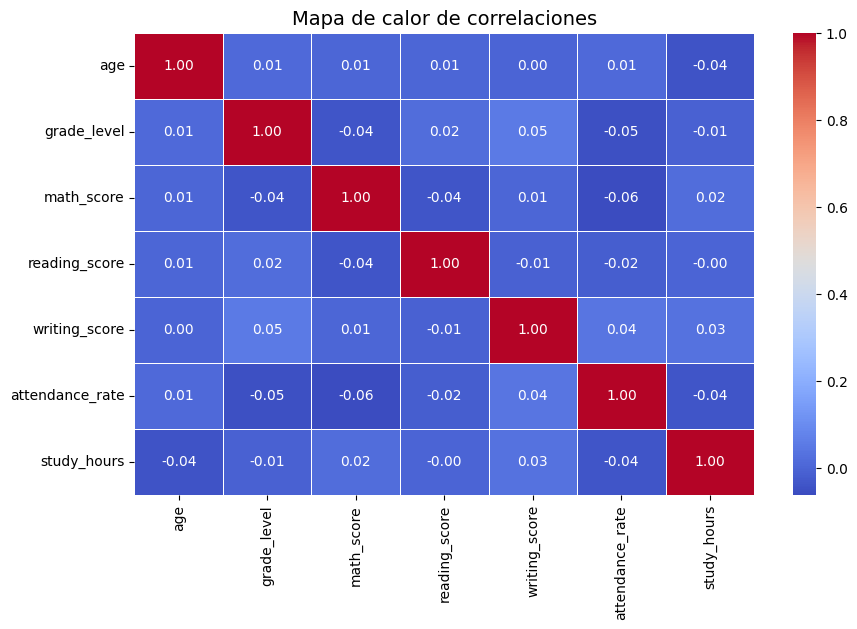

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data from the correct URL
df = pd.read_csv("https://raw.githubusercontent.com/Estadistica2025BB/Estadistica2025B/refs/heads/main/student_info.csv")

# The following lines are commented out as they are not needed
# import pandas as pt
# df=pt.read_csv("https://raw.githubusercontent.com/Estadistica2025BB/Estadistica2025B/refs/heads/main/student_info.csv")
# df


# Convert 'gender' from text to numbers

# --- Crear matriz de correlaciones ---
corr = df.corr(numeric_only=True)

# --- Dibujar mapa de calor ---
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de calor de correlaciones", fontsize=14)
plt.show()

In [ ]:
df.describe()

,gender,age,grade_level,math_score,reading_score,writing_score,attendance_rate,study_hours
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.964000,15.999000,2.473000,75.165000,74.293000,75.150000,89.879179,2.978380
std,0.820596,0.817109,1.136029,14.304349,14.312652,14.395094,5.725007,1.167780
min,1.000000,15.000000,1.000000,50.000000,50.000000,50.000000,80.000614,1.015673
25%,1.000000,15.000000,1.000000,63.000000,62.000000,63.000000,84.971772,1.955287
50%,2.000000,16.000000,2.000000,75.000000,74.000000,75.000000,89.980889,2.962665
75%,3.000000,17.000000,4.000000,88.000000,86.000000,88.000000,94.629778,3.994360
max,3.000000,17.000000,4.000000,99.000000,99.000000,99.000000,99.954988,4.997843


1362.3468033966178
204409.77500000002
356.543480295281
coeficiente de correlacion= 0.0214
coeficiente de correlacion PearsonRResult(statistic=np.float64(0.021365734668730013), pvalue=np.float64(0.49975464538422715))
0.0004564946179345704
coeficiente de determinación: 0.0004564946179345704
parametros: const          74.385520
study_hours     0.261713
dtype: float64


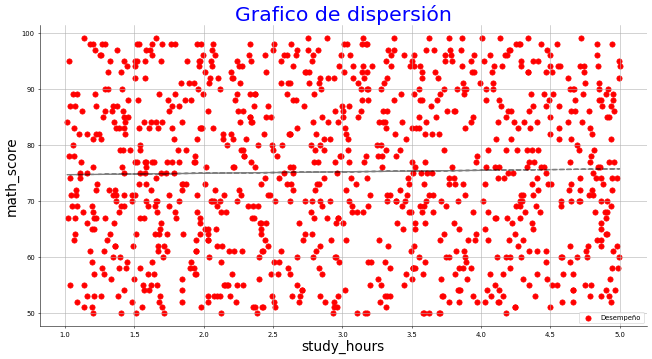


Coeficiente de determinacion= 0.0005

 intervalo de confianza:                      0          1
const        71.952077  76.818963
study_hours  -0.498995   1.022420


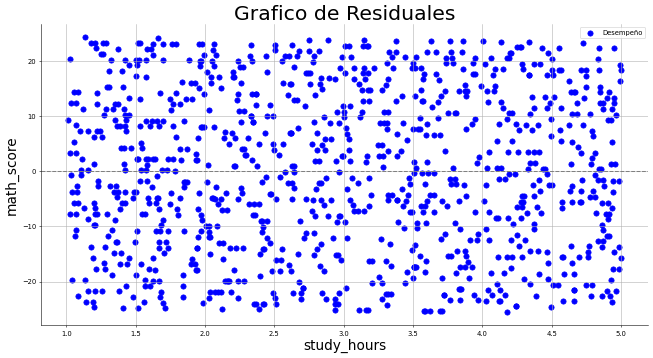

valor_p(shapiro)=  7.579759992816948e-17
valor_p de Breusch-Pagan: 0.5597

x=2 [74.90894548]
x=7 [76.21750906]

Ultimo paso


,df,sum_sq,mean_sq,F,PR(>F)
x,1.0,93.311962,93.311962,0.45579,0.499755
Residual,998.0,204316.463038,204.725915,NaN,NaN


In [ ]:
#X=gender
#y=math_score

#1.Establesca una variable dependiente ( Y ) y una variable independiente ( X ).
x = df["study_hours"]
y = df["math_score"]

#2. grafico de dispersion
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8), dpi=49)
plt.scatter(x, y, label="Desempeño", color="red", s=60)
plt.xlabel("study_hours", fontsize= 20)
plt.ylabel("math_score", fontsize= 20)
plt.title("Grafico de dispersión", color= "blue", fontsize= 30)
plt.gca().spines[["top","right"]].set_visible(False)
plt.grid()
plt.legend()

#3.¿Los datos soportan la suposición de linealidad? no soporto la linealidad

#4.Calcule el coeficiente de correlación e interprete el resultado.
Sxx=((x - x.mean())**2).sum()
print(Sxx)
Syy=((y - y.mean())**2).sum()
print(Syy)
Sxy=((x - x.mean())*(y-y.mean())).sum()
print(Sxy)
from math import sqrt
r= Sxy/sqrt(Sxx*Syy)
print("coeficiente de correlacion=", round(r,4))
# print("coeficiente de correlacion (forma facil)=", df.corr())
from scipy.stats import pearsonr
print("coeficiente de correlacion", pearsonr(x,y))
# "~" significa depende de ejemplo x~y
#r= coeficiente de correlacion


#5 Calcule el coeficiente de determinación e interprete el resultado.
#print(r**2)
#r= pearsonr(x,y)
#print(r)


print(r**2)
print("coeficiente de determinación:",r**2)


#6.Obtenga la recta de regresión ajustada y grafíquelo sobre el gráfico de
#dispersión.

import statsmodels.api as sm
x_constante=sm.add_constant(x)
x
x_constante
modelo=sm.OLS(y,x_constante).fit()
modelo.params
#respuesta y=24.53 + 0.643x
print("parametros:", modelo.params)
yc=modelo.predict(x_constante)
plt.plot(x, yc, color="black", linestyle="--", linewidth=2, alpha=0.5)
plt.show()

from sklearn.metrics import r2_score
r2=r2_score(y,yc)
print("\nCoeficiente de determinacion=", round(r2,4))

#7
intervalo_de_confianza=modelo.conf_int(alpha=0.05)
intervalo_de_confianza

print("\n intervalo de confianza:", intervalo_de_confianza)

#8
import matplotlib.pyplot as plt
residuales=modelo.resid
plt.figure(figsize=(16,8), dpi=49)
plt.scatter(x,residuales, label="Desempeño", color="blue",s=60)
plt.xlabel("study_hours", fontsize=20)
plt.ylabel("math_score", fontsize=20)
plt.title("Grafico de Residuales", fontsize=30,)
plt.gca().spines[["top","right"]].set_visible(False)
plt.grid()
plt.legend()

plt.axhline(y=0,color="gray", linestyle="--")
plt.show()



#el test de shapiro es para menores de 30 y el test de breusch pagan para mas de
#30

#9.tes de shapiro
#H0: hay normalidad
#Hi: no hay normalidad
# sig.: 0.05

from scipy.stats import shapiro
estadistico_shapiro, valor_p_shapiro= shapiro(residuales)
print("valor_p(shapiro)= ", valor_p_shapiro)

#hay normalidad, no se rechaza hipotesis nula


#10.tes de breusch-pagan
#H0: hay homocedasticidad
#Hi: no hay homocedasticidad
#sig.: 0.05

from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print(f'valor_p de Breusch-Pagan: {valor_p_bp:0.4f}\n')

#hay homocedasticidad, por lo tanto no se rechaza la hipotesis nula

#11
#interpolar: esta dentro del rango de X y debe haber correlacion
#extrapolar: es que esta fuera del rengo de X y debe de cumplir con todos los
#supuestos (usar con precausion)

print("x=2", modelo.predict([1,2]))
print("x=7", modelo.predict([1,7]))

   #supuestos: linealidad, homocedasticidad, normalidad ( estos ultimos 2 son
   #residuales)


#12
#Ho= B1=0
#H1 (diferente) B1
df["x"]=x
df["y"]=y
print("\nUltimo paso")
from statsmodels.formula.api import ols
modelo_lineal=ols("y~x", data=df).fit()
tabla_anova=sm.stats.anova_lm(modelo_lineal)
tabla_anova